# 📄 Generating plot demonstrating the impact of minor species on manifold topologies (**Figure 4**)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
scaling = 'auto'
n_components = 2
sample_percentage = 100

In [3]:
data_tag = 'lightweight-flamelet-CO-H2-10-1'
%run -i load-SLFM-data.py

Removing N2.

The data set has 9800 observations.

Using: T, H2, O2, OH, H2O, CO, CO2 as target variables.


In [4]:
selected_variables = [8, 2, 6, 4, 0, 10]
print(state_space_names[selected_variables])

pca = reduction.PCA(state_space[:,selected_variables], scaling=scaling, n_components=n_components)
PCs = pca.transform(state_space[:,selected_variables])
PC_sources = pca.transform(state_space_sources[:,selected_variables], nocenter=True)
symlog_PC_sources = preprocess.log_transform(PC_sources, method='continuous-symlog', threshold=1.e-4)

(PCs, _, _) = preprocess.center_scale(PCs, '-1to1')

['CO' 'O2' 'H' 'OH' 'T' 'HCO']


In [5]:
selected_variables = [8, 2, 4, 0]
print(state_space_names[selected_variables])

pca = reduction.PCA(state_space[:,selected_variables], scaling=scaling, n_components=n_components)
PCs_compare = pca.transform(state_space[:,selected_variables])
PC_sources_compare = pca.transform(state_space_sources[:,selected_variables], nocenter=True)
symlog_PC_sources_compare = preprocess.log_transform(PC_sources_compare, method='continuous-symlog', threshold=1.e-4)

(PCs_compare, _, _) = preprocess.center_scale(PCs_compare, '-1to1')

['CO' 'O2' 'OH' 'T']


***

## ✏️ Plot

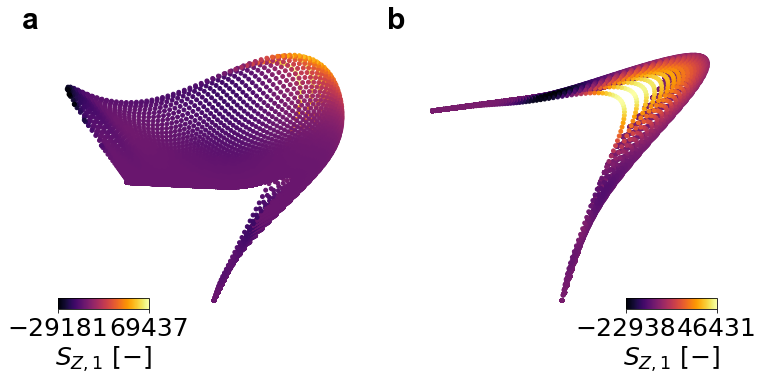

In [6]:
figure = plt.figure(figsize=(12, 5))
spec = figure.add_gridspec(ncols=2, nrows=1, width_ratios=[1, 1], height_ratios=[1])

point_size = 15

figure_a = figure.add_subplot(spec[0,0:1])
scat_a = figure_a.scatter(PCs[:,0], PCs[:,1], c=PC_sources[:,0], s=point_size, cmap='inferno')
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'a', **hfont, fontsize=30, transform=figure_a.transAxes)
cbaxes = inset_axes(figure_a, width="30%", height="4%", loc='lower left')
cbar = plt.colorbar(scat_a, ticks=[np.min(PC_sources[:,0]),np.max(PC_sources[:,0])], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$S_{Z,1}$ [$-$]', fontsize=25, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)
        
figure_b = figure.add_subplot(spec[0,1:2])
scat_b = figure_b.scatter(PCs_compare[:,0], PCs_compare[:,1], c=PC_sources_compare[:,0], s=point_size, cmap='inferno')
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.text(-0.1,1.05,'b', **hfont, fontsize=30, transform=figure_b.transAxes)
cbaxes = inset_axes(figure_b, width="30%", height="4%", loc='lower right')
cbar = plt.colorbar(scat_b, ticks=[np.min(PC_sources_compare[:,0]),np.max(PC_sources_compare[:,0])], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$S_{Z,1}$ [$-$]', fontsize=25, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(25)

plt.savefig('../figures/Figure-4.png', dpi=200, bbox_inches='tight')

***

## Compute costs for the two manifolds

In [7]:
tic = time.perf_counter()

depvars = np.hstack((PC_sources, symlog_PC_sources, target_variables))
depvars_names = ['SZ' + str(i) for i in range(1,n_components+1)] + ['contsymlog-SZ' + str(i) for i in range(1,n_components+1)] + target_variables_names

variance_data = analysis.compute_normalized_variance(PCs, 
                                                     depvars, 
                                                     depvar_names=depvars_names,
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

costs = analysis.cost_function_normalized_variance_derivative(variance_data, 
                                                             penalty_function=penalty_function, 
                                                             norm=None, 
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.6 minutes.
----------------------------------------


In [8]:
for i, variable in enumerate(depvars_names):
    print(variable + ':\t' + str(round(costs[i],3)))

SZ1:	1.454
SZ2:	1.183
contsymlog-SZ1:	1.858
contsymlog-SZ2:	1.754
T:	1.25
H2:	1.063
O2:	0.918
OH:	1.137
H2O:	1.156
CO:	1.039
CO2:	1.253


In [9]:
print(np.sum(costs))

14.064206498521925


In [10]:
tic = time.perf_counter()

depvars = np.hstack((PC_sources_compare, symlog_PC_sources_compare, target_variables))

variance_data_compare = analysis.compute_normalized_variance(PCs_compare,
                                                     depvars,
                                                     depvar_names=depvars_names,
                                                     scale_unit_box=False,
                                                     bandwidth_values=bandwidth_values)

costs_compare = analysis.cost_function_normalized_variance_derivative(variance_data_compare,
                                                             penalty_function=penalty_function,
                                                             norm=None,
                                                             integrate_to_peak=False)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.7 minutes.
----------------------------------------


In [11]:
for i, variable in enumerate(depvars_names):
    print(variable + ':\t' + str(round(costs_compare[i],3)))

SZ1:	4.186
SZ2:	4.16
contsymlog-SZ1:	1.995
contsymlog-SZ2:	1.978
T:	1.113
H2:	0.992
O2:	0.81
OH:	1.334
H2O:	1.164
CO:	0.966
CO2:	1.094


In [12]:
print(np.sum(costs_compare))

19.792822402240702


***